## Import Packages

In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pylab as plt
import seaborn as sns

## Load Dataset

In [2]:
utilities_df = pd.read_csv('Utilities.csv')
utilities_df.head()

,Company,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
0,Arizona,1.06,9.2,151,54.4,1.6,9077,0.0,0.628
1,Boston,0.89,10.3,202,57.9,2.2,5088,25.3,1.555
2,Central,1.43,15.4,113,53.0,3.4,9212,0.0,1.058
3,Commonwealth,1.02,11.2,168,56.0,0.3,6423,34.3,0.700
4,NY,1.49,8.8,192,51.2,1.0,3300,15.6,2.044


In [3]:
utilities_df.set_index('Company', inplace = True)
utilities_df = utilities_df.apply(lambda x: x.astype('float64'))
utilities_df.dtypes

Fixed_charge     float64
RoR              float64
Cost             float64
Load_factor      float64
Demand_growth    float64
Sales            float64
Nuclear          float64
Fuel_Cost        float64
dtype: object

In [4]:
d = pairwise.pairwise_distances(utilities_df, metric = 'euclidean')
pd.DataFrame(d, columns = utilities_df.index, index = utilities_df.index).head()

Company,Arizona,Boston,Central,Commonwealth,NY,Florida,Hawaiian,Idaho,Kentucky,Madison,...,Northern,Oklahoma,Pacific,Puget,San Diego,Southern,Texas,Wisconsin,United,Virginia
Company,,,,,,,,,,,,,,,,,,,,,
Arizona,0.000000,3989.408076,140.402855,2654.277632,5777.167672,2050.529440,1435.265019,4006.104187,671.276346,2622.699002,...,1899.279821,598.556633,2609.045363,6914.742065,3363.061626,1063.009074,4430.251585,1790.485648,2427.588875,1016.617691
Boston,3989.408076,0.000000,4125.044132,1335.466502,1788.068027,6039.689076,2554.287162,7994.155985,3318.276558,1367.090634,...,2091.160485,4586.302564,1380.749962,10903.146464,629.760748,5052.331669,8419.610541,2199.721665,1562.210811,5005.081262
Central,140.402855,4125.044132,0.000000,2789.759674,5912.552908,1915.155154,1571.295401,3872.257626,807.920792,2758.559663,...,2035.441520,461.341670,2744.502847,6780.430307,3498.113013,928.749249,4295.014690,1925.772564,2563.637362,883.535455
Commonwealth,2654.277632,1335.466502,2789.759674,0.000000,3123.153215,4704.363099,1219.560005,6659.534567,1983.314354,43.648894,...,756.831954,3250.984589,56.644626,9568.434429,710.292965,3717.202963,7084.372839,864.273153,232.476871,3670.018191
NY,5777.167672,1788.068027,5912.552908,3123.153215,0.000000,7827.429211,4342.093798,9782.158178,5106.094153,3155.095594,...,3879.167462,6373.743249,3168.177463,12691.155108,2414.698757,6840.150291,10207.392630,3987.335962,3350.073118,6793.035300


## Normalization

In [5]:
utilities_df_norm = (utilities_df - utilities_df.mean()) / utilities_df.std()
utilities_df_norm.head()

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
Company,,,,,,,,
Arizona,-0.293158,-0.684639,-0.417122,-0.577715,-0.526228,0.045903,-0.714629,-0.853675
Boston,-1.214511,-0.194454,0.821002,0.206836,-0.333812,-1.077764,0.792048,0.813297
Central,1.712141,2.078224,-1.339646,-0.891536,0.051019,0.083931,-0.714629,-0.080431
Commonwealth,-0.509947,0.206607,-0.004414,-0.219063,-0.943128,-0.701706,1.328020,-0.724202
NY,2.037324,-0.862888,0.578233,-1.295019,-0.718643,-1.581428,0.214389,1.692638


## Hierarchical Clustering
### Single

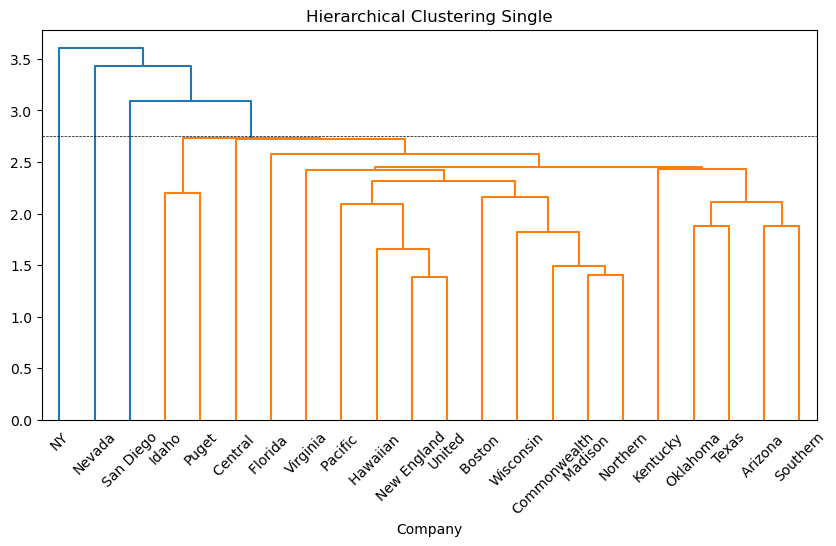

In [6]:
z = linkage(utilities_df_norm, method = 'single')

fig = plt.figure(figsize = (10, 6))
fig.subplots_adjust(bottom = 0.23)
plt.title('Hierarchical Clustering Single')
plt.xlabel('Company')

dendrogram(z, labels = utilities_df_norm.index, color_threshold = 2.75)
plt.axhline(y = 2.75, color = 'black', linewidth = 0.5, linestyle = 'dashed')
plt.show()

In [7]:
memb = fcluster(linkage(utilities_df_norm, 'single'), 6, criterion = 'maxclust')
memb = pd.Series(memb, index = utilities_df_norm.index)

for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  Idaho, Puget
2 :  Arizona , Boston , Commonwealth, Florida , Hawaiian , Kentucky, Madison , New England, Northern, Oklahoma, Pacific , Southern, Texas, Wisconsin, United, Virginia
3 :  Central 
4 :  San Diego
5 :  Nevada
6 :  NY


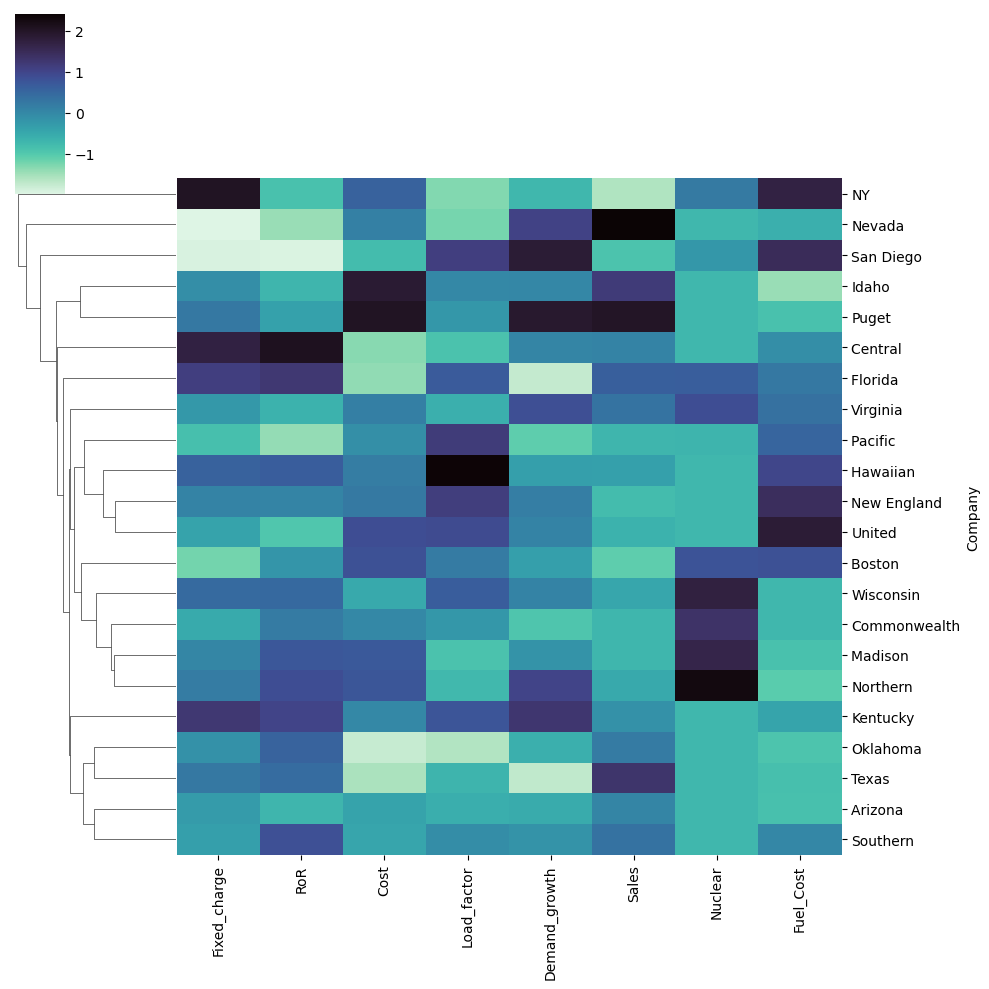

In [8]:
sns.clustermap(utilities_df_norm, method = 'single', col_cluster = False, cmap = 'mako_r')
plt.show()

### Complete

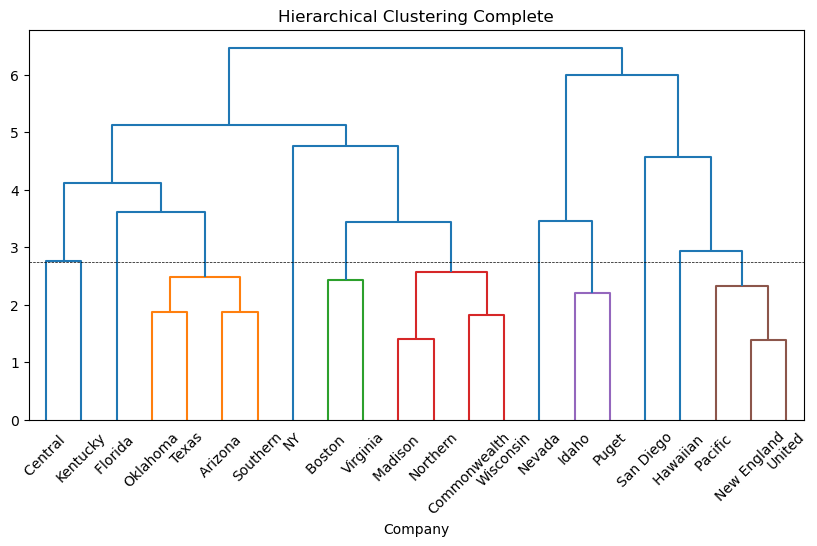

In [9]:
z = linkage(utilities_df_norm, method = 'complete')

fig = plt.figure(figsize = (10, 6))
fig.subplots_adjust(bottom = 0.23)
plt.title('Hierarchical Clustering Complete')
plt.xlabel('Company')

dendrogram(z, labels = utilities_df_norm.index, color_threshold = 2.75)
plt.axhline(y = 2.75, color = 'black', linewidth = 0.5, linestyle = 'dashed')
plt.show()

In [10]:
memb = fcluster(linkage(utilities_df_norm, 'complete'), 12, criterion = 'maxclust')
memb = pd.Series(memb, index = utilities_df_norm.index)

for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  Central 
2 :  Kentucky
3 :  Arizona , Oklahoma, Southern, Texas
4 :  Florida 
5 :  Boston , Virginia
6 :  Commonwealth, Madison , Northern, Wisconsin
7 :  NY
8 :  Idaho, Puget
9 :  Nevada
10 :  New England, Pacific , United
11 :  Hawaiian 
12 :  San Diego


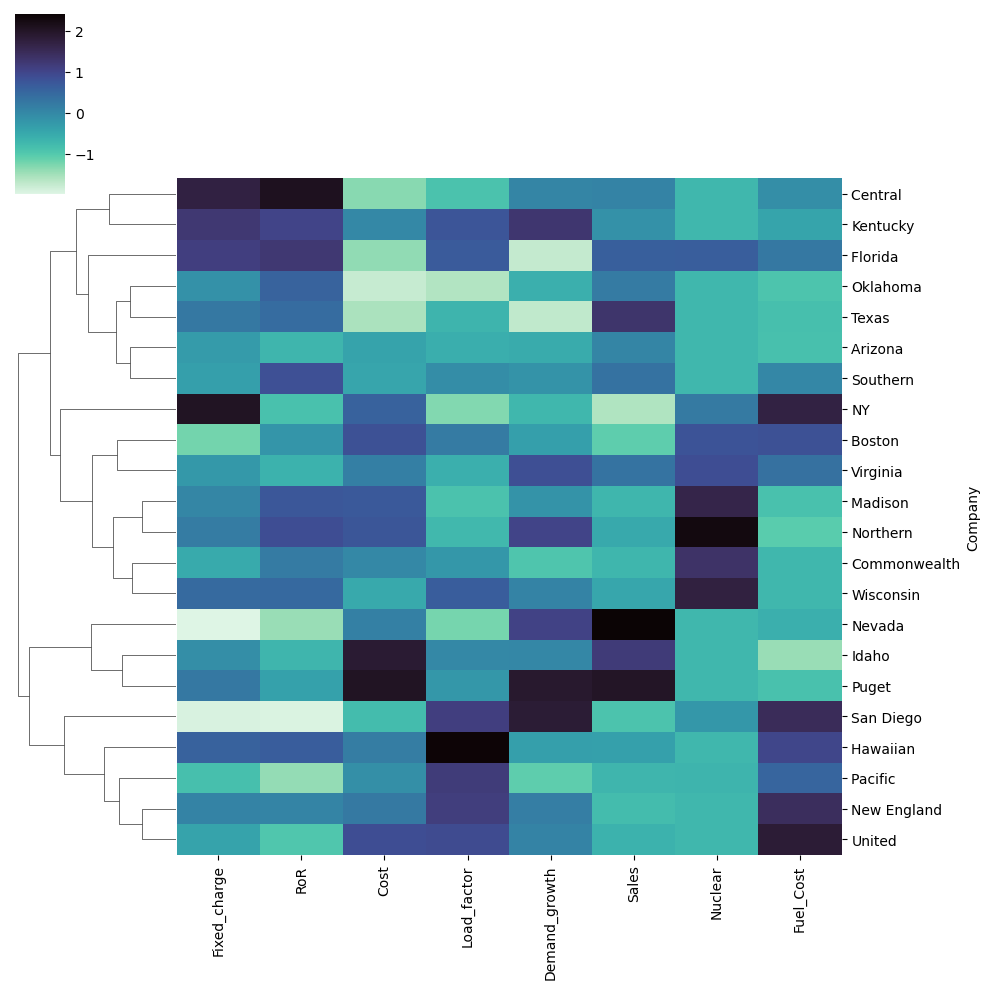

In [11]:
sns.clustermap(utilities_df_norm, method = 'complete', col_cluster = False, cmap = 'mako_r')
plt.show()

### Average

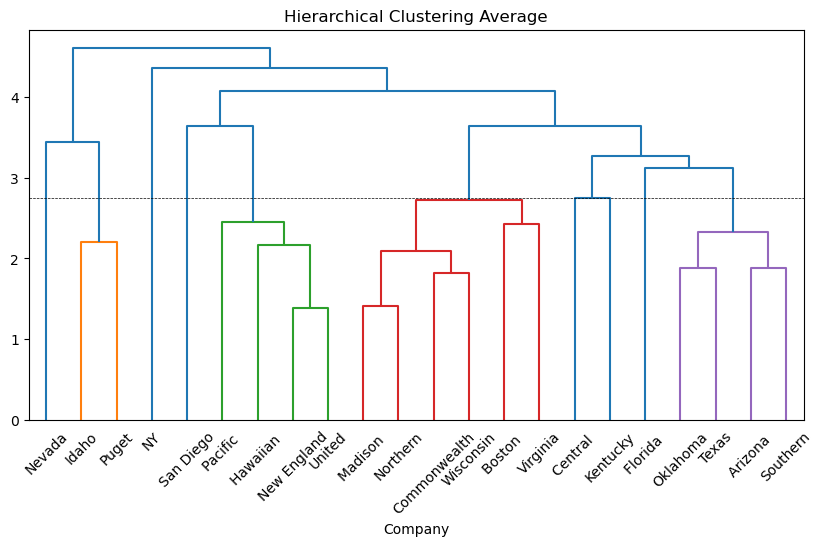

In [12]:
z = linkage(utilities_df_norm, method = 'average')

fig = plt.figure(figsize = (10, 6))
fig.subplots_adjust(bottom = 0.23)
plt.title('Hierarchical Clustering Average')
plt.xlabel('Company')

dendrogram(z, labels = utilities_df_norm.index, color_threshold = 2.75)
plt.axhline(y = 2.75, color = 'black', linewidth = 0.5, linestyle = 'dashed')
plt.show()

In [13]:
memb = fcluster(linkage(utilities_df_norm, 'average'), 10, criterion = 'maxclust')
memb = pd.Series(memb, index = utilities_df_norm.index)

for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  Idaho, Puget
2 :  Nevada
3 :  Hawaiian , New England, Pacific , United
4 :  San Diego
5 :  Boston , Commonwealth, Madison , Northern, Wisconsin, Virginia
6 :  Central 
7 :  Kentucky
8 :  Arizona , Oklahoma, Southern, Texas
9 :  Florida 
10 :  NY


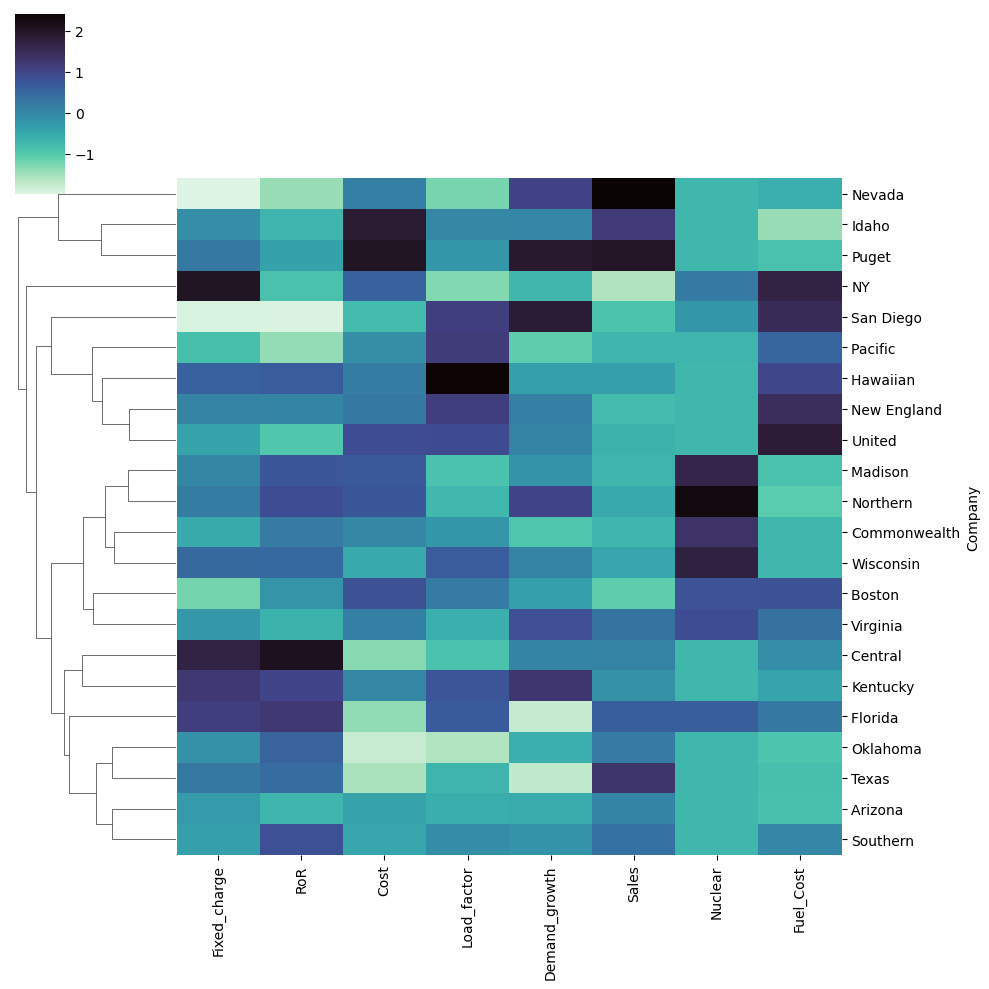

In [14]:
sns.clustermap(utilities_df_norm, method = 'average', col_cluster = False, cmap = 'mako_r')
plt.show()

### Weighted

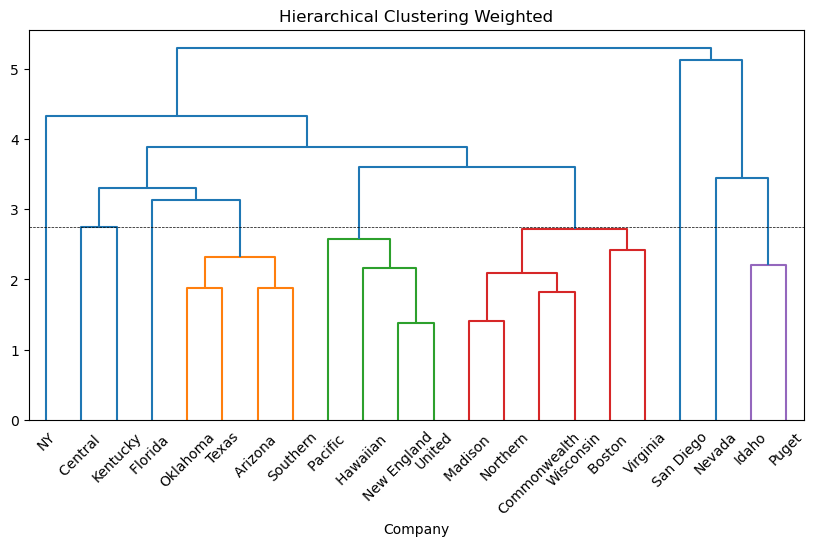

In [15]:
z = linkage(utilities_df_norm, method = 'weighted')

fig = plt.figure(figsize = (10, 6))
fig.subplots_adjust(bottom = 0.23)
plt.title('Hierarchical Clustering Weighted')
plt.xlabel('Company')

dendrogram(z, labels = utilities_df_norm.index, color_threshold = 2.75)
plt.axhline(y = 2.75, color = 'black', linewidth = 0.5, linestyle = 'dashed')
plt.show()

In [16]:
memb = fcluster(linkage(utilities_df_norm, 'weighted'), 10, criterion = 'maxclust')
memb = pd.Series(memb, index = utilities_df_norm.index)

for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  Central 
2 :  Kentucky
3 :  Arizona , Oklahoma, Southern, Texas
4 :  Florida 
5 :  Hawaiian , New England, Pacific , United
6 :  Boston , Commonwealth, Madison , Northern, Wisconsin, Virginia
7 :  NY
8 :  Idaho, Puget
9 :  Nevada
10 :  San Diego


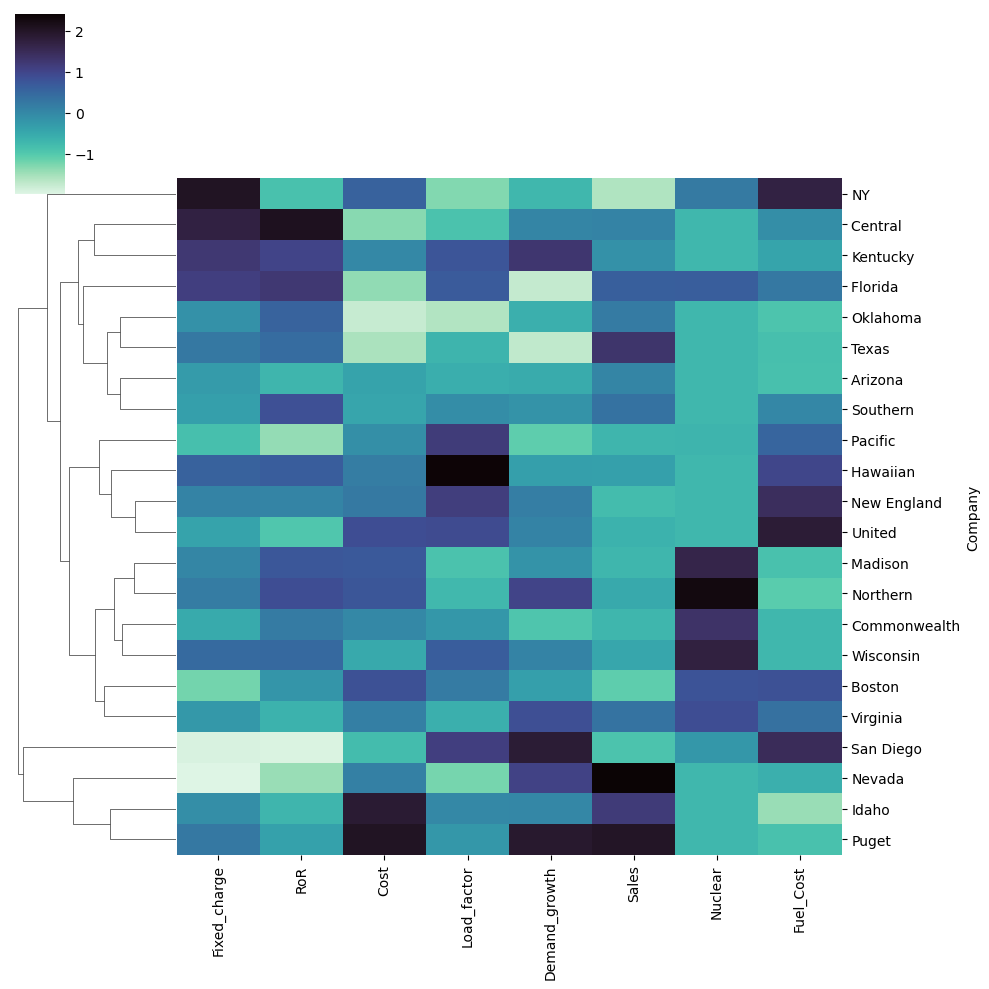

In [17]:
sns.clustermap(utilities_df_norm, method = 'weighted', col_cluster = False, cmap = 'mako_r')
plt.show()

### Centroid

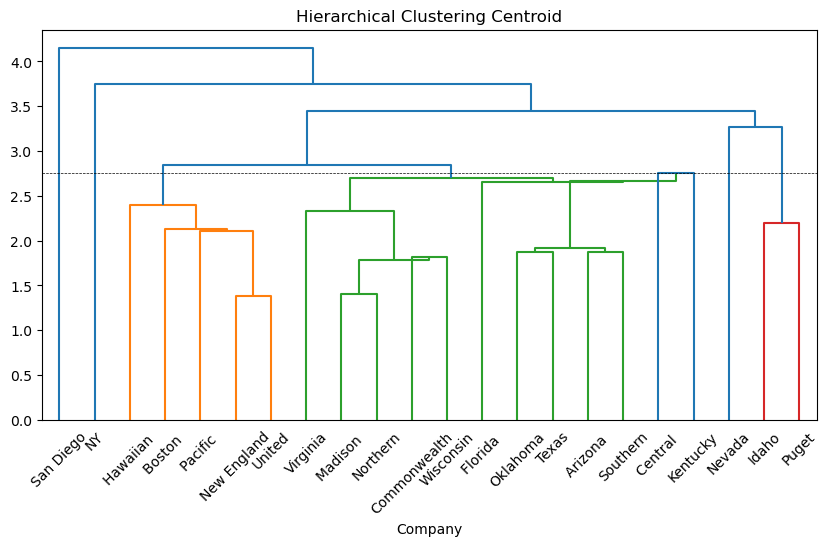

In [18]:
z = linkage(utilities_df_norm, method = 'centroid')

fig = plt.figure(figsize = (10, 6))
fig.subplots_adjust(bottom = 0.23)
plt.title('Hierarchical Clustering Centroid')
plt.xlabel('Company')

dendrogram(z, labels = utilities_df_norm.index, color_threshold = 2.75)
plt.axhline(y = 2.75, color = 'black', linewidth = 0.5, linestyle = 'dashed')
plt.show()

In [19]:
memb = fcluster(linkage(utilities_df_norm, 'centroid'), 6, criterion = 'maxclust')
memb = pd.Series(memb, index = utilities_df_norm.index)

for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  Boston , Hawaiian , New England, Pacific , United
2 :  Arizona , Central , Commonwealth, Florida , Kentucky, Madison , Northern, Oklahoma, Southern, Texas, Wisconsin, Virginia
3 :  Idaho, Puget
4 :  Nevada
5 :  NY
6 :  San Diego


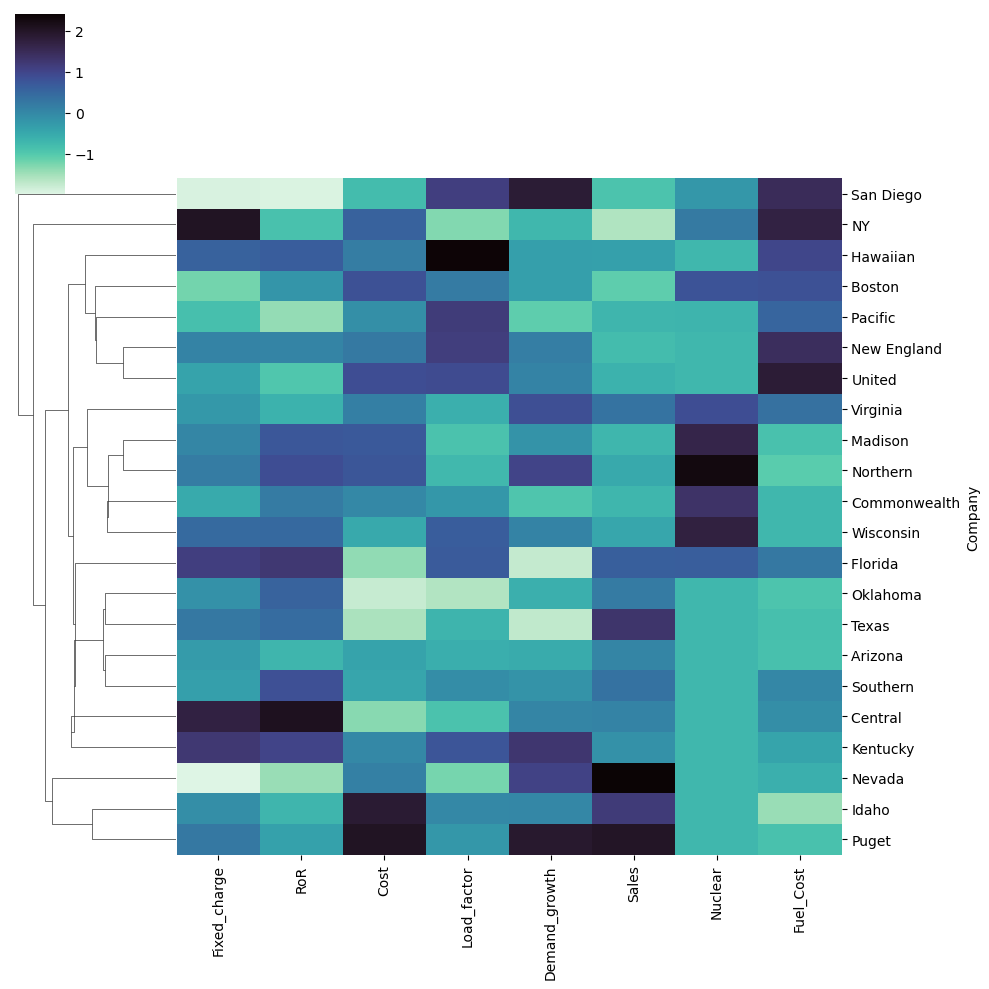

In [20]:
sns.clustermap(utilities_df_norm, method = 'centroid', col_cluster = False, cmap = 'mako_r')
plt.show()